# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [2]:
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [3]:
(X_1, y_1), (X_2, y_2) = mnist.load_data()

In [4]:
X_0_4=X_1[y_1<5]

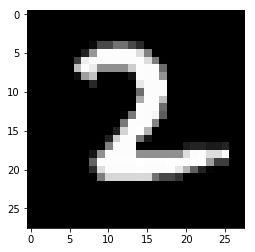

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_0_4[140], cmap=plt.get_cmap('gray')) #checking the data is between 0-4

In [6]:
y_0_4=y_1[y_1<5]

In [7]:
X_4_9=X_2[y_2>4]
y_4_9=y_2[y_2>4]

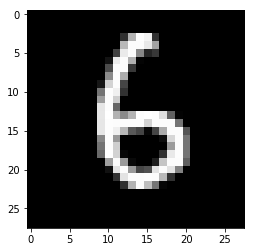

In [8]:
plt.imshow(X_4_9[10], cmap=plt.get_cmap('gray')) #checking the data is between 4-9

## 3. Print x_train, y_train, x_test and y_test for both the datasets

In [9]:
print (X_0_4.shape)
print(y_0_4.shape)

(30596, 28, 28)
(30596,)


In [10]:
print (X_4_9.shape)
print(y_4_9.shape)

(4861, 28, 28)
(4861,)


## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_0_4, y_0_4, test_size=0.2, random_state=2)
print (X_train.shape)
print (X_test.shape)

(24476, 28, 28)
(6120, 28, 28)


In [12]:
X_train=X_train.reshape(24476,28,28,1)
X_test=X_test.reshape(6120,28,28,1)

## 5. Normalize x_train and x_test by dividing it by 255

In [13]:
X_train=X_train/255.0
X_test=X_test/255.0

In [14]:
y_test[0:4]

array([0, 3, 0, 2], dtype=uint8)

## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
from keras.utils import np_utils

In [15]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [16]:
y_test.shape

(6120, 5)

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
    # Define Model
    model = Sequential()

    #Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1),name='conv_1'))

    #Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
    model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model.add(Dropout(0.25))

## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [108]:
    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    
    # More Dropout
    model.add(Dropout(0.5))

    # Prediction Layer
    model.add(Dense(5))
    model.add(Activation('softmax'))
    
     # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model.fit(x_train_1, y_train1_cat, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test_1, y_test1_cat), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 10s 325us/step - loss: 0.0885 - acc: 0.9733 - val_loss: 0.0099 - val_acc: 0.9961
Epoch 2/10
30596/30596 [==============================] - 10s 314us/step - loss: 0.0289 - acc: 0.9906 - val_loss: 0.0087 - val_acc: 0.9971
Epoch 3/10
30596/30596 [==============================] - 10s 311us/step - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0106 - val_acc: 0.9957
Epoch 4/10
30596/30596 [==============================] - 9s 310us/step - loss: 0.0155 - acc: 0.9952 - val_loss: 0.0074 - val_acc: 0.9973
Epoch 5/10
30596/30596 [==============================] - 9s 310us/step - loss: 0.0124 - acc: 0.9958 - val_loss: 0.0098 - val_acc: 0.9975
Epoch 6/10
30596/30596 [==============================] - 10s 311us/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.0049 - val_acc: 0.9984
Epoch 7/10
30596/30596 [==============================] - 10s 311us/step - loss: 0.0098 - acc: 0.9969 - val_loss: 0.007

## 9. Print the training and test accuracy

In [109]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print("Train Accuracy :",train_accuracy*100,'%')

30596/30596 [==============================] - 3s 88us/step
Train Accuracy : 99.96731598901818 %


In [110]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy :",test_accuracy*100,'%')

5139/5139 [==============================] - 1s 99us/step
Test Accuracy : 99.80540961276513 %


## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [111]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False
    
#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_pooling2d_4
False
dropout_6
False
flatten_3
False
dense_5
True
activation_7
False
dropout_7
False
dense_6
True
activation_8
False


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_4_9, y_4_9, test_size=0.2, random_state=2)
print (X_train2.shape)
print (X_test2.shape)

(3888, 28, 28)
(973, 28, 28)


In [18]:
X_train2=X_train2.reshape(3888,28,28,1)
X_test2=X_test2.reshape(973,28,28,1)

In [ ]:
x_train_2 /= 255
x_test_2 /= 255

In [19]:
import numpy as np
np.unique(y_test2)

array([5, 6, 7, 8, 9], dtype=uint8)

In [20]:
y_train2 = keras.utils.to_categorical(y_train2)
y_test2= keras.utils.to_categorical(y_test2)

In [21]:
y_test2[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [22]:
y_train2=y_train2[:,5:]
y_test2=y_test2[:,5:]

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [139]:
#Training on the dataset
model.fit(x_train2, y_train2,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test2, y_test2))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 7s 226us/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0248 - val_acc: 0.9949
Epoch 2/10
29404/29404 [==============================] - 6s 213us/step - loss: 0.0116 - acc: 0.9961 - val_loss: 0.0232 - val_acc: 0.9949
Epoch 3/10
29404/29404 [==============================] - 6s 214us/step - loss: 0.0104 - acc: 0.9965 - val_loss: 0.0226 - val_acc: 0.9953
Epoch 4/10
29404/29404 [==============================] - 6s 213us/step - loss: 0.0081 - acc: 0.9970 - val_loss: 0.0263 - val_acc: 0.9947
Epoch 5/10
29404/29404 [==============================] - 6s 212us/step - loss: 0.0087 - acc: 0.9967 - val_loss: 0.0218 - val_acc: 0.9953
Epoch 6/10
29404/29404 [==============================] - 6s 213us/step - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0221 - val_acc: 0.9949
Epoch 7/10
29404/29404 [==============================] - 6s 214us/step - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0222 - v

## 12. Print the accuracy for classification of digits 5 to 9

In [142]:
#Evaluating the model on train set
score = model.evaluate(x_train2, y_train2)
print('Train loss:', score[0])
print('Train accuracy:', score[1]*100,'%')

29404/29404 [==============================] - 3s 91us/step
Train loss: 0.0003386955433130696
Train accuracy: 99.99319820432594 %


In [144]:
#Testing the model on test set
score = model.evaluate(x_test2, y_test2)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,'%')

4861/4861 [==============================] - 0s 95us/step
Test loss: 0.024438329167176503
Test accuracy: 99.54741822670232 %


## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [145]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
data = pd.read_csv('/drive/My Drive/Colab Notebooks/data/tweets.csv', engine='python').dropna()

In [208]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
import spacy
import nltk
import re
nlp = spacy.load('en_core_web_sm')

In [0]:
#preprocessing using special character removal
def preprocess(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [0]:
data['text'] = [preprocess(text) for text in data.tweet_text]

In [212]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 I have a 3G iPhone After 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPadiPhon...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad 2 also They s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa Maye...


### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [0]:
emotion = ['Negative emotion','Positive emotion']
data_filtered = data[data.is_there_an_emotion_directed_at_a_brand_or_product.isin(emotion)]

In [214]:
data_filtered.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [215]:
data_filtered.shape

(3191, 4)

### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 1))

In [217]:
# learn the 'vocabulary' of the training data
vect.fit(data_filtered['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [218]:
# transform data into a 'document-term matrix'
data_filtered_dtm = vect.transform(data_filtered['text'])
data_filtered_dtm

<3191x6103 sparse matrix of type '<class 'numpy.int64'>'
	with 52449 stored elements in Compressed Sparse Row format>

In [219]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(data_filtered_dtm.toarray(), columns=vect.get_feature_names()).head()

,02,03,0310,10,100,1000,10000,100s,100tc,101,1030,1045am3,105,106,10am,10k,10mins,10pm,10x,11,11m,11ntc,11th,12,1230p,12b,12th,13,130000,136,14,140608,1413,1415,14day,15,150,1500,150m,157,...,york,you,you_,youd,youll,youneedthis,youquot,your,youre,yours,yourself,youtube,youve,yowza,yr,yrs,yrsday,yummy,yup,zaarly,zaarlyiscoming,zagg,zaggle,zappos,zazzle,zazzlesxsw,zazzlsxsw,ze,zelda,zeldman,zero,zimride,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 17. Find number of different words in vocabulary

In [220]:
len(vect.get_feature_names())

6103

#### Tip: To see all available functions for an Object use dir

In [221]:
dir(vect)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_sort_features',
 '_stop_words_id',
 '_validate_custom_analyzer',
 '_validate_params',
 '_validate_vocabulary',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',
 'fixed_vocabulary_',
 'get_feature_names',
 'get_params',
 'get_stop_words',
 'input',
 'inverse_transf

### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [222]:
data_filtered.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [223]:
data_filtered['labels']=data_filtered.is_there_an_emotion_directed_at_a_brand_or_product.map({'Positive emotion':1,'Negative emotion':0})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
data_filtered.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,labels
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 I have a 3G iPhone After 3 hrs tweeti...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee Know about fludapp Awesome iPadiPhon...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin Can not wait for iPad 2 also They s...,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw I hope this years festival isnt as crashy...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on Fri SXSW Marissa Maye...,1


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:
X = data_filtered_dtm
Y = data_filtered['labels']

In [236]:
# spliting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train_dtm, X_test_dtm, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2233, 6103)
(958, 6103)
(2233,)
(958,)


## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [237]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [239]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8549060542797495

In [240]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 54, 106],
       [ 33, 765]])

In [0]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [242]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.98307648, 0.9668924 , 0.62424748, 0.09946203, 0.93559017,
       0.99518585, 0.8729795 , 0.99523776, 0.95224787, 0.9681021 ,
       0.96647662, 0.94484032, 0.9962137 , 0.87474799, 0.92885908,
       0.96922092, 0.05910354, 0.99361293, 0.96428779, 0.96066242,
       0.95170463, 0.65572119, 0.62268506, 0.97472789, 0.93218059,
       0.9838908 , 0.89329853, 0.99697541, 0.95933459, 0.92790573,
       0.96924184, 0.99842503, 0.93355818, 0.65001536, 0.73089328,
       0.95874044, 0.99614739, 0.74749049, 0.63646453, 0.9668828 ,
       0.97226285, 0.96361401, 0.77837282, 0.76379647, 0.81820739,
       0.2673044 , 0.9940449 , 0.69404547, 0.68960153, 0.9776847 ,
       0.99039984, 0.95717928, 0.99785671, 0.93141853, 0.90773494,
       0.99870981, 0.87672225, 0.93397907, 0.99405332, 0.98119378,
       0.98710668, 0.98535   , 0.99861685, 0.97608628, 0.79813603,
       0.89824111, 0.94784928, 0.9960485 , 0.93449542, 0.98070753,
       0.97232069, 0.79142647, 0.9110336 , 0.83385484, 0.99613

In [243]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.872651356993737

## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
X = data_filtered['text']
Y = data_filtered['labels']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=2)

In [0]:
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [247]:
tokenize_test(vect)

Features:  5066
Accuracy:  0.8653444676409185


### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [248]:
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  23899
Accuracy:  0.8757828810020877


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [250]:
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  4828
Accuracy:  0.8653444676409185


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [251]:
vect = CountVectorizer(stop_words='english',max_features=300)
tokenize_test(vect)

Features:  300
Accuracy:  0.8225469728601252


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [253]:
vect = CountVectorizer(ngram_range=(1,2),max_features=15000)
tokenize_test(vect)

Features:  15000
Accuracy:  0.8716075156576201


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [254]:
vect = CountVectorizer(ngram_range=(1,2),min_df=2)
tokenize_test(vect)

Features:  7325
Accuracy:  0.8768267223382046
